In this  Tumor prediction problem   we want to classify the persons into  two classes Malignant and Benign  (Malignant samples, which represent cancerous cells that have the potential to invade and spread to other parts of the body.Benign samples, which represent non-cancerous cells that do not have the ability to invade and spread to other parts of the body.)

The dtaset have some un vwanted features and our target variable wants to convert into numerical values for better prediction so there is need preprocessing on the dataset  . split the dataset into X_train,y_train,X_test,y_test then here use KNN algotrithum for model prediction.Confusion Matrix are used for model evaluation .


In [1]:
#importing requred libraries
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#read the dataset
df= pd.read_csv("/home/futures/Downloads/KNNAlgorithmDataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# preprocessing

In [3]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

In [4]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.shape

(569, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
df["diagnosis"].replace({'M':1,'B':0},inplace=True)


M: Malignant samples, which represent cancerous cells that have the potential to invade and spread to other parts of the body. 

B: Benign samples, which represent non-cancerous cells that do not have the ability to invade and spread to other parts of the body. 


<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

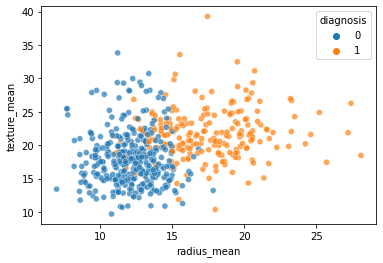

In [9]:
sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis",data=df,alpha=0.7)

(15.0, 25.0)

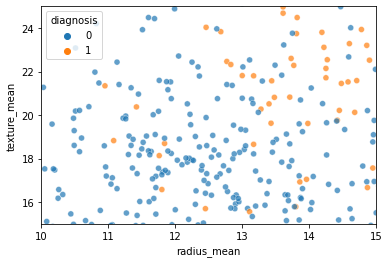

In [10]:
sns.scatterplot(x="radius_mean",y="texture_mean",hue="diagnosis",data=df, alpha=0.7)
plt.xlim(10,15)
plt.ylim(15,25)

#plt.xlim(10,15): This line of code sets the limits of the x-axis to be between 10 and 15. 
#This means that only data points with "radius_mean" values between 10 and 15 will be shown on the plot.

#plt.ylim(15,25): This line of code sets the limits of the y-axis to be between 15 and 25.
#This means that only data points with "texture_mean" values between 15 and 25 will be shown on the plot.



In [11]:
X = df.drop("diagnosis",axis=1)
y = df["diagnosis"]

# data split

In [12]:
#test_train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=65)

# model prediction and evaluation

In [13]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)

In [14]:
 model.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
y_pred=model.predict(X_test)


In [16]:
model.score(X_train,y_train)

0.937007874015748

# model Evaluation

In [17]:
#evaluate precision and recall
from sklearn.metrics import precision_score, recall_score,accuracy_score,ConfusionMatrixDisplay
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9521276595744681
Precision: 0.9594594594594594
Recall: 0.922077922077922


In [18]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       111
           1       0.96      0.92      0.94        77

    accuracy                           0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



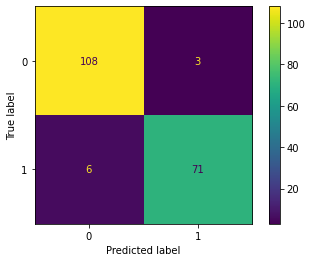

In [19]:
conf_matrix=confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=[0, 1])
  
cm_display.plot()
plt.show()

In the output, the accuracy of the model is 95%. Precision is approximately 0.959  and Recall is 0.922. F1 score is approximately 0.933. Finally, the confusion matrix is plotted. Here class labels denote the target classes: 
Malignant-1
Benign-0
From the confusion matrix, we see that 108 Benign classes were correctly predicted. 71 Malignant test cases were also correctly predicted by the model .6 classes are predicted icorrectly as negative 
